In [ ]:
# Celda 1: Importar librerías y cargar datos JSON
import json
import os
import matplotlib.pyplot as plt
import numpy as np

results_path = "../results"  # Ajusta la ruta si es necesario

def load_metrics(filename):
    with open(os.path.join(results_path, filename), "r") as f:
        return json.load(f)

metrics_before = load_metrics("docker_before_metrics.json")
metrics_after = load_metrics("docker_after_metrics.json")

print("Métricas antes del benchmark:", metrics_before)
print("Métricas después del benchmark:", metrics_after)


Métricas antes del benchmark: {'label': 'docker_before', 'cpu_percent': 10.4, 'memory': {'total': 3078217728, 'available': 2261987328, 'percent': 26.5, 'used': 623742976, 'free': 1919766528, 'active': 213938176, 'inactive': 577093632, 'buffers': 36945920, 'cached': 497762304, 'shared': 3244032, 'slab': 143777792}, 'disk': {'total': 1081101176832, 'used': 2980810752, 'free': 1023128010752, 'percent': 0.3}, 'timestamp': 1748253838.7086713}
Métricas después del benchmark: {'label': 'docker_after', 'cpu_percent': 6.3, 'memory': {'total': 3078217728, 'available': 2256007168, 'percent': 26.7, 'used': 629538816, 'free': 1912164352, 'active': 215871488, 'inactive': 572198912, 'buffers': 38060032, 'cached': 498454528, 'shared': 3284992, 'slab': 144281600}, 'disk': {'total': 1081101176832, 'used': 2980827136, 'free': 1023127994368, 'percent': 0.3}, 'timestamp': 1748253878.1537726}


In [53]:
# Celda 2: Extraer métricas clave y preparar datos para graficar

def extract_metrics(metrics):
    cpu = metrics.get("cpu_percent", 0)
    mem_used = metrics.get("memory", {}).get("used", 0)
    mem_total = metrics.get("memory", {}).get("total", 1)  # evitar división por 0
    disk_used = metrics.get("disk", {}).get("used", 0)
    disk_total = metrics.get("disk", {}).get("total", 1)
    mem_percent = (mem_used / mem_total) * 100
    disk_percent = (disk_used / disk_total) * 100
    return cpu, mem_percent, disk_percent

cpu_before, mem_before, disk_before = extract_metrics(metrics_before)
cpu_after, mem_after, disk_after = extract_metrics(metrics_after)

labels = ["CPU (%)", "Memoria (%)", "Disco (%)"]
before = [cpu_before, mem_before, disk_before]
after = [cpu_after, mem_after, disk_after]


C:\Users\TESTER\AppData\Local\Temp\ipykernel_4072\410355569.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\TESTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


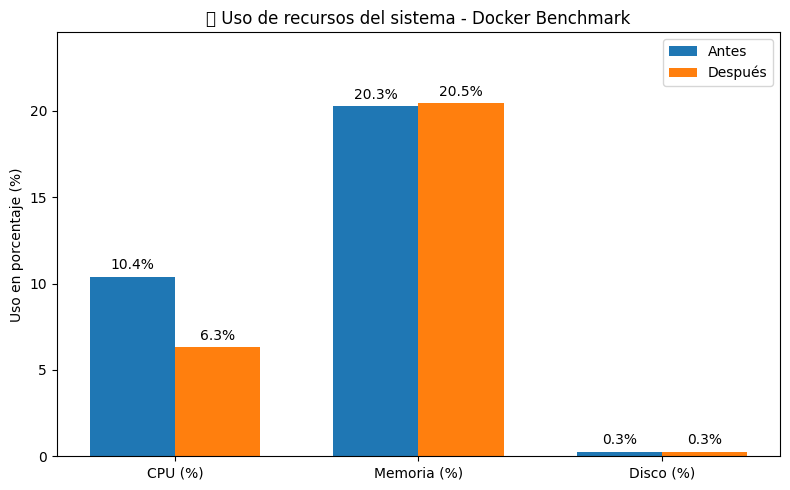

In [54]:
# Celda 3: Graficar la comparación antes y después del benchmark

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, before, width, label="Antes")
rects2 = ax.bar(x + width/2, after, width, label="Después")

ax.set_ylabel("Uso en porcentaje (%)")
ax.set_title("📊 Uso de recursos del sistema - Docker Benchmark")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Añadir etiquetas encima de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, max(max(before), max(after)) * 1.2)
plt.tight_layout()
plt.show()
